## TASK1

In [252]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt
from sklearn.model_selection import train_test_split
from models.five_fold_validation import k_fold_validation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
wine = pd.read_csv("data/winequality/winequality-red.csv", sep=";")
cancer = pd.read_csv("data/breastcancer/breast-cancer-wisconsin.data", delimiter=",")
wine.head()
cancer.head()

,id,thickness,cell_size,cell_shape,adhesion,e_cell_size,bare_nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 1.2 (a) for completions sake, reading it into numpy array. 

In [30]:
wine_np = np.genfromtxt("data/winequality/winequality-red.csv", delimiter=";") 
wine_np

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [31]:
# for completions sake, reading it into numpy array.
cancer_np = np.genfromtxt("data/winequality/winequality-red.csv", delimiter=";") 
cancer_np

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

### 1.2 (b) convert wine data and cancer data to binary

In [208]:
total_row_count = wine.shape[0]
wine['classified'] = [1 if x>=6 else 0 for x in wine["quality"] ]

## test conversion, total should equal 0s and 1s
total_row_count == wine[wine.classified==1].shape[0] + wine[wine.classified==0].shape[0]

True

In [33]:
## malignant is 1,  benign is 0
cancer['classified'] = [1 if x == 4 else 0 for x in cancer["class"]]

### 1.3 missing or malinformed features

In [34]:
# check for anything thats not an int or a float
wine_columns_invalid = wine.applymap(lambda x: not isinstance(x, (int, float))).any()
wine_columns_invalid.any()

False

In [35]:
cancer_columns_invalid = cancer.applymap(lambda x: not isinstance(x, (int, float))).any()
cancer_columns_invalid.any()

True

In [36]:
## check for the faulty column
cancer_columns_invalid

id             False
thickness      False
cell_size      False
cell_shape     False
adhesion       False
e_cell_size    False
bare_nuclei     True
chromatin      False
nucleoli       False
mitosis        False
class          False
classified     False
dtype: bool

In [37]:
cancer.bare_nuclei.apply(lambda x: type(x))

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
694    <class 'str'>
695    <class 'str'>
696    <class 'str'>
697    <class 'str'>
698    <class 'str'>
Name: bare_nuclei, Length: 699, dtype: object

In [311]:
cancer.mitosis.apply(lambda x: type(x))

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
           ...      
694    <class 'int'>
695    <class 'int'>
696    <class 'int'>
697    <class 'int'>
698    <class 'int'>
Name: mitosis, Length: 699, dtype: object

In [38]:
cancer[cancer.bare_nuclei == "?"].shape[0]

16

In [39]:
# remove entries where cancer.bare_nuclie == ? and convert the column to int
cancer = cancer[cancer.bare_nuclei != "?"]
cancer.bare_nuclei = pd.to_numeric(cancer.bare_nuclei)

In [40]:
## run the checks again, should be false
cancer_columns_invalid = cancer.applymap(lambda x: not isinstance(x, (int, float))).any()
cancer_columns_invalid.any()

False

### 1.4 Compute statistics for the data

In [41]:
wine_X = np.array(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
wine_y = np.array(wine[['classified']])

In [42]:
cancer_X = np.array(cancer[['thickness', 'cell_size', 'cell_shape', 'adhesion', 'e_cell_size',
       'bare_nuclei', 'chromatin', 'nucleoli', 'mitosis']])
cancer_y = np.array(cancer[["classified"]])

##### wine data

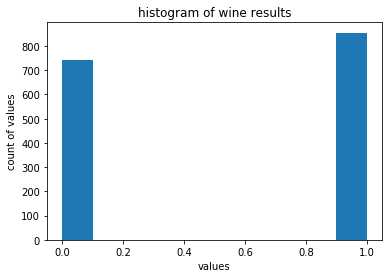

In [43]:
pt.hist(wine.classified)
pt.ylabel("count of values")
pt.xlabel("values")
pt.title('histogram of wine results')
pt.show()


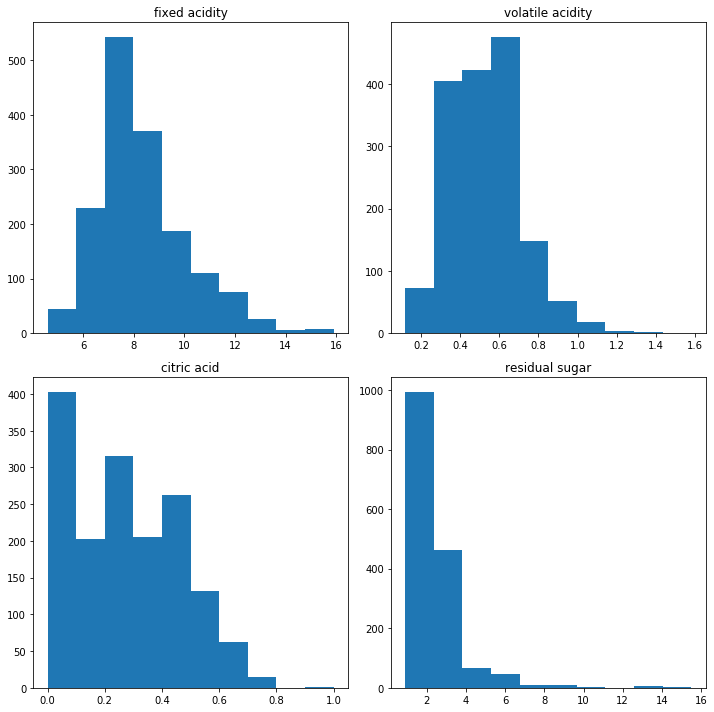

In [44]:
fig, axs = pt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(wine['fixed acidity'])
axs[0, 0].set_title('fixed acidity')
axs[0, 1].hist(wine['volatile acidity'])
axs[0, 1].set_title('volatile acidity')
axs[1, 0].hist(wine['citric acid'])
axs[1, 0].set_title('citric acid')
axs[1, 1].hist(wine['residual sugar'])
axs[1, 1].set_title('residual sugar')
fig.tight_layout()
pt.show()

#### cancer data

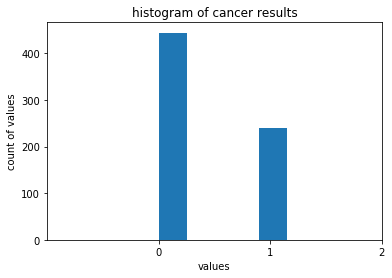

In [45]:
bins = np.arange(3)-0.5
pt.hist(cancer.classified, width=0.25, align='mid')
pt.ylabel("count of values")
pt.xlabel("values")
pt.title('histogram of cancer results')
pt.xticks(range(3))
pt.xlim([-1, 2])
pt.show()

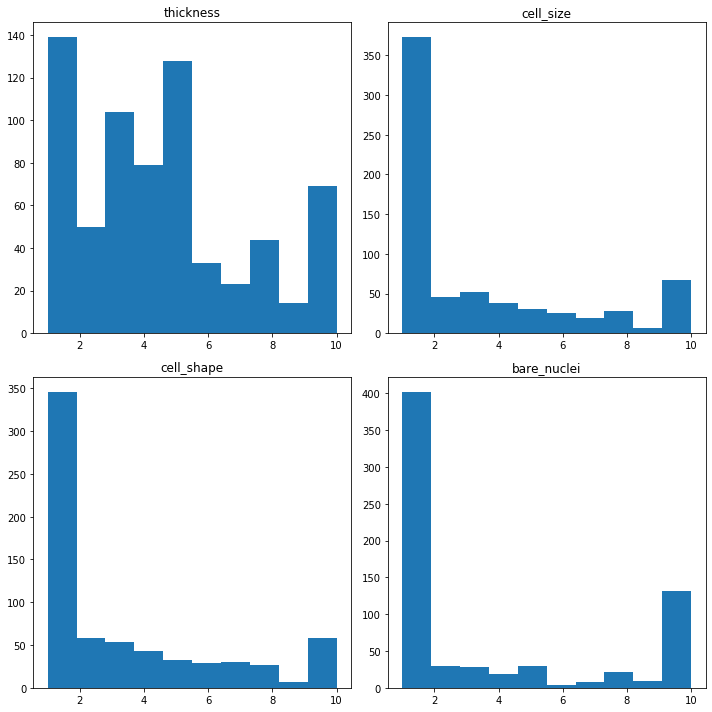

In [46]:
fig, axs = pt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(cancer['thickness'])
axs[0, 0].set_title('thickness')
axs[0, 1].hist(cancer['cell_size'])
axs[0, 1].set_title('cell_size')
axs[1, 0].hist(cancer['cell_shape'])
axs[1, 0].set_title('cell_shape')
axs[1, 1].hist(cancer['bare_nuclei'])
axs[1, 1].set_title('bare_nuclei')
fig.tight_layout()
pt.show()

## TASK 2

In [47]:
wine_X = np.array(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
wine_y = np.array(wine[['classified']])

In [48]:
cancer_X = np.array(cancer[['thickness', 'cell_size', 'cell_shape', 'adhesion', 'e_cell_size',
       'bare_nuclei', 'chromatin', 'nucleoli', 'mitosis']])
cancer_y = np.array(cancer[["classified"]])

In [49]:
from sklearn.model_selection import train_test_split

#### Logistic Regression

###### wine data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
wine_model=LogisticRegression(solver="lbfgs", max_iter=1000)
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75625

In [292]:
from models.logistic_regression import LogisticRegression as CustomLogisticRegression

In [293]:
custom_wine_model = CustomLogisticRegression(0.00001, 100)
custom_wine_model.fit(X_train, y_train)
custom_y_predicted = custom_wine_model.predict(X_test)

starting model training with learning_rate =  1e-05 and num of iterations  100 reg factor 0 reg type 0


In [294]:
custom_wine_model.score(X_test, y_test)

0.521875

###### cancer data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.20)

In [57]:
cancer_model = LogisticRegression(solver="lbfgs", max_iter=1000)
cancer_model.fit(X_train, y_train)
y_predicted = cancer_model.predict(X_test)
cancer_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.948905109489051

In [296]:
custom_cancer_model = CustomLogisticRegression(0.001, 100)
custom_cancer_model.fit(X_train, y_train)
custom_y_predicted = custom_cancer_model.predict(X_test)

starting model training with learning_rate =  0.001 and num of iterations  100 reg factor 0 reg type 0


In [297]:
custom_cancer_model.score(X_test, y_test)

0.521875

#### Linear Discriminant Analysis

###### wine data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [87]:
wine_model= LinearDiscriminantAnalysis()
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7375

In [88]:
from models.linear_discriminant_analysis import LearnDiscriminantAnalysis as LDA

In [90]:
custom_wine_model = LDA()
custom_wine_model.fit(X_train, y_train)

model trained


In [91]:
custom_wine_model.score(X_test, y_test)

0.7375

###### cancer data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.20)

In [93]:
cancer_model = LinearDiscriminantAnalysis()
cancer_model.fit(X_train, y_train)
y_predicted = cancer_model.predict(X_test)
cancer_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.948905109489051

In [94]:
custom_cancer_model = LDA()
custom_cancer_model.fit(X_train, y_train)
custom_y_predicted = custom_cancer_model.predict(X_test)

model trained


In [298]:
custom_cancer_model.score(X_test, y_test)

0.521875

#### K-fold cross validation

#### Standard Logistic Regression

In [300]:
wine_model = LogisticRegression(solver="lbfgs", max_iter=1000)
k_fold_validation(wine_X, wine_y.reshape(len(wine_y),), wine_model,5)

score: 0.6875
time: 0.06409788131713867
score: 0.696875
time: 0.11700606346130371
score: 0.746875
time: 0.0457003116607666
score: 0.78125
time: 0.12688088417053223
score: 0.7304075235109718
time: 0.059960126876831055
average score: 0.7285815047021944
average time: 0.08272905349731445


0.7285815047021944

In [299]:
cancer_model = LogisticRegression(solver="lbfgs", max_iter=1000)
k_fold_validation(cancer_X, cancer_y.reshape(len(cancer_y),), cancer_model,5)

score: 0.9343065693430657
time: 0.020858287811279297
score: 0.948905109489051
time: 0.011723756790161133
score: 0.9708029197080292
time: 0.010136842727661133
score: 0.9779411764705882
time: 0.009614944458007812
score: 1.0
time: 0.016199111938476562
average score: 0.9663911550021468
average time: 0.013706588745117187


0.9663911550021468

#### Custom Logistic Regression

In [301]:
from models.logistic_regression import LogisticRegression as LR

In [302]:
learnrate, max_iter = 0.0001, 100
wine_custom_model = LR( learnrate, max_iter)
k_fold_validation(wine_X, wine_y, wine_custom_model,5)

starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.690625
time: 2.225679874420166
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.3875
time: 2.1224629878997803
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.478125
time: 2.105513095855713
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.696875
time: 1.9420857429504395
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.5611285266457681
time: 1.9527602195739746
average score: 0.5628507053291536
average time: 2.0697003841400146


0.5628507053291536

In [303]:
cancer_custom_model = LR(learnrate, max_iter)
k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)

starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.781021897810219
time: 0.8991570472717285
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.8759124087591241
time: 0.8727900981903076
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.8321167883211679
time: 0.9911768436431885
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.8382352941176471
time: 0.9474880695343018
starting model training with learning_rate =  0.0001 and num of iterations  100 reg factor 0 reg type 0
score: 0.9191176470588235
time: 0.9139461517333984
average score: 0.8492808072133963
average time: 0.924911642074585


0.8492808072133963

#### Standard LDA

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
wine_model = LinearDiscriminantAnalysis()
k_fold_validation(wine_X, wine_y.reshape(len(wine_y),), wine_model,5)

score: 0.69375
time: 0.008784294128417969


0.69375

In [120]:
cancer_model = LinearDiscriminantAnalysis()
k_fold_validation(cancer_X, cancer_y.reshape(len(cancer_y),), cancer_model,5)

score: 0.8905109489051095
time: 0.00430607795715332


0.8905109489051095

#### Custom LDA

In [79]:
from models.linear_discriminant_analysis import LearnDiscriminantAnalysis as LDA

In [80]:
wine_custom_lda = LDA()
k_fold_validation(wine_X, wine_y, wine_custom_lda,5)

model trained
model trained
model trained
model trained
model trained
score: [0.69375]
time: 0.06235694885253906


array([0.69375])

In [81]:
cancer_custom_model = LDA()
k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)

model trained
model trained
model trained
model trained
model trained
score: [0.89051095]
time: 0.03140997886657715


array([0.89051095])

## TASK 3

### experiment with different learning rates, runtime and accuracy for Logistic regression

In [275]:
#do runtime measurements
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
n_iter = 300

In [276]:
for learn in lr:
    print("accuracy of learning rate " + str(learn) + ": ")
    wine_custom_model = LR(learn, n_iter)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")


accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0 reg type 0
score: 0.6125
time: 6.367065906524658
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0 reg type 0
score: 0.3875
time: 5.746532201766968
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0 reg type 0
score: 0.61875
time: 6.2431862354278564
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0 reg type 0
score: 0.696875
time: 6.428929805755615
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0 reg type 0
score: 0.5141065830721003
time: 6.488473176956177
average score: 0.5659463166144201
average time: 6.254837465286255

accuracy of learning rate 0.01: 
starting model training with learning_rate =  0.01 and num of iterations  300 reg factor 0 reg type 0
score: 0.6125
time: 6.333739995956421
starting model tr

In [124]:
for learn in lr:
    print("accuracy of learning rate " + str(learn) + ": ")
    cancer_custom_model = LR(learnrate, max_iter)
    k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)
    print("")

accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.40252287  0.48486982  0.26855285  0.12798566 -0.5851789   0.48253749
 -0.25857099  0.23760149 -0.27854239]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34497068  0.43298706  0.23561769  0.08404434 -0.47399206  0.3872104
 -0.24861692  0.29036355 -0.19720276]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34884959  0.47036658  0.29612595  0.09051158 -0.41851098  0.35346466
 -0.3170787   0.24136968 -0.16019725]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.24259122  0.47575784  0.24105813  0.13541297 -0.434275    0.3895818
 -0.42556181  0.2322706  -0.17016326]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with par

### 3.2 runtime and accuracy for Logistic Regression vs LDA done in the k-fold validation section

### 3.3 Wine dataset, new feature exploration with Logistic Regression

In [238]:
wine = pd.read_csv("data/winequality/winequality-red.csv", sep=";")
wine['classified'] = [1 if x>=6 else 0 for x in wine["quality"] ]

In [239]:
wine_squared = wine.copy(True)

In [240]:
for column in wine_squared.columns:
    if column != 'quality' or column != 'classified':
        wine_squared[column+' 2'] = wine_squared[column]**2

In [241]:
wine_squared.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,residual sugar 2,chlorides 2,free sulfur dioxide 2,total sulfur dioxide 2,density 2,pH 2,sulphates 2,alcohol 2,quality 2,classified 2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,3.61,0.005776,121.0,1156.0,0.995605,12.3201,0.3136,88.36,25,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,6.76,0.009604,625.0,4489.0,0.993610,10.2400,0.4624,96.04,25,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,5.29,0.008464,225.0,2916.0,0.994009,10.6276,0.4225,96.04,25,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,3.61,0.005625,289.0,3600.0,0.996004,9.9856,0.3364,96.04,36,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,3.61,0.005776,121.0,1156.0,0.995605,12.3201,0.3136,88.36,25,0


##### using both the squared and non-squared features

In [242]:
wine_X = np.array(wine_squared[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'fixed acidity 2', 'volatile acidity 2', 'citric acid 2', 'residual sugar 2',
       'chlorides 2', 'free sulfur dioxide 2', 'total sulfur dioxide 2', 'density 2',
       'pH 2', 'sulphates 2', 'alcohol 2']])
wine_y = np.array(wine_squared[['classified']])

In [243]:
wine_X.shape

(1599, 22)

In [244]:
from models.logistic_regression import LogisticRegression as LR

In [245]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [246]:
wine_model=LR(learning_rate=0.00001, max_iter=100)
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

starting model training with learning_rate =  1e-05 and num of iterations  100
model trained with params [ 1.08541870e+00  2.99170476e-02  5.25432748e-02  3.08944439e-01
  7.97421482e-03  1.90811656e+00  3.44777799e+00  1.17252965e-01
  3.89814321e-01  1.02038939e-01  1.45541291e+00  1.05376704e+01
  8.03168755e-04  2.54509026e-02  1.11681963e+00  3.75586594e-04
  3.21361164e+01 -1.27315825e+01  1.16778890e-01  1.29439468e+00
  8.59502854e-02  1.78361261e+01]


array([0.521875])

In [264]:
k_fold_validation(wine_X, wine_y, wine_model,5)

starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.60625
time: 3.7702178955078125
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.3875
time: 2.4853909015655518
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.471875
time: 2.531095027923584
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.68125
time: 2.163975238800049
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.5454545454545454
time: 2.0967559814453125
average score: 0.5384659090909091
average time: 2.609487009048462


0.5384659090909091

##### using only the squared features

In [265]:
wine_X = np.array(wine_squared[['fixed acidity 2', 'volatile acidity 2', 'citric acid 2', 'residual sugar 2',
       'chlorides 2', 'free sulfur dioxide 2', 'total sulfur dioxide 2', 'density 2',
       'pH 2', 'sulphates 2', 'alcohol 2']])
wine_y = np.array(wine_squared[['classified']])

In [266]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [267]:
wine_model=LR(learning_rate=0.00001, max_iter=100)
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

starting model training with learning_rate =  1e-05 and num of iterations  100


array([0.553125])

In [268]:
k_fold_validation(wine_X, wine_y, wine_model,5)

starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.603125
time: 2.110936164855957
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.3875
time: 2.0674517154693604
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.478125
time: 2.0168750286102295
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.675
time: 1.9575963020324707
starting model training with learning_rate =  1e-05 and num of iterations  100
score: 0.5611285266457681
time: 2.025783061981201
average score: 0.5409757053291536
average time: 2.0357284545898438


0.5409757053291536

##### as shown above, just using the squared features, we get  a better accuracy

#### EXTRA 

## L2 regularization

In [286]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

##### testing with different reg_factor (lambda) values 

In [278]:
#do runtime measurements, 0.1 has a better accuarcy as shown above
reg_factor = [1, 0.1, 0.01, 0.001, 0.0001]
n_iter = 300
learn = 0.1
for factor in reg_factor:
    print("accuracy of learning rate " + str(factor) + ": ")
    wine_custom_model = LR(learn, n_iter, factor, reg_type=2)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")


accuracy of learning rate 1: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.625
time: 6.045644760131836
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.61875
time: 5.822701692581177
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.6
time: 5.839579105377197
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.675
time: 5.818820953369141
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.5642633228840125
time: 7.4851930141448975
average score: 0.6166026645768025
average time: 6.202387905120849

accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0.1 reg type 2
score: 0.54375
time: 6.093235015869141
starting model training w

#### so higher reg_factor improves accruacy, a 1 gave us an accuracy of 0.61, lets try with increased reg_factor

In [279]:
#do runtime measurements, 0.1 has a better accuarcy as shown above
reg_factor = [5, 4, 3, 2, 1]
n_iter = 300
learn = 0.1
for factor in reg_factor:
    print("accuracy of learning rate " + str(factor) + ": ")
    wine_custom_model = LR(learn, n_iter, factor, reg_type=2)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")

accuracy of learning rate 5: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 2
score: 0.65
time: 5.758153200149536
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 2
score: 0.44375
time: 5.728413105010986
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 2
score: 0.6
time: 5.892446994781494
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 2
score: 0.675
time: 7.786763906478882
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 2
score: 0.5642633228840125
time: 6.0666821002960205
average score: 0.5866026645768025
average time: 6.246491861343384

accuracy of learning rate 4: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 4 reg type 2
score: 0.678125
time: 5.92648983001709
starting model training with l

#### so then values decreased when we used a higher factor, best value so far is 1 with L2

#### L1 Regularization

In [283]:
#do runtime measurements, 0.1 has a better accuarcy as shown above
reg_factor = [1, 0.1, 0.01, 0.001, 0.0001]
n_iter = 300
learn = 0.1
for factor in reg_factor:
    print("accuracy of learning rate " + str(factor) + ": ")
    wine_custom_model = LR(learn, n_iter, factor, reg_type=1)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")

accuracy of learning rate 1: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 1
score: 0.390625
time: 6.164261817932129
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 1
score: 0.44375
time: 5.611676931381226
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 1
score: 0.596875
time: 5.711230993270874
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 1
score: 0.696875
time: 5.5657877922058105
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 1
score: 0.5642633228840125
time: 5.712253093719482
average score: 0.5384776645768025
average time: 5.753042125701905

accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 0.1 reg type 1
score: 0.6125
time: 5.786595106124878
starting model 

##### no significant improvement with L1

In [284]:
#do runtime measurements, 0.1 has a better accuarcy as shown above
reg_factor = [5, 4, 3, 2, 1]
n_iter = 300
learn = 0.1
for factor in reg_factor:
    print("accuracy of learning rate " + str(factor) + ": ")
    wine_custom_model = LR(learn, n_iter, factor, reg_type=1)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")

accuracy of learning rate 5: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 1
score: 0.390625
time: 6.033698081970215
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 1
score: 0.459375
time: 5.899637937545776
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 1
score: 0.565625
time: 5.787629127502441
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 1
score: 0.678125
time: 5.81407904624939
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 5 reg type 1
score: 0.5015673981191222
time: 5.838652849197388
average score: 0.5190634796238245
average time: 5.874739408493042

accuracy of learning rate 4: 
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 4 reg type 1
score: 0.590625
time: 5.849004030227661
starting model tra

##### no significant improvement with L1

# final test LR with best params for wine data

In [308]:
learnrate, max_iter = 0.1, 300
wine_custom_model = LR( learnrate, max_iter, reg_factor=1, reg_type=2)
k_fold_validation(wine_X, wine_y, wine_custom_model,5)

starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.625
time: 5.760757923126221
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.61875
time: 5.623934030532837
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.6
time: 5.658431053161621
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.675
time: 5.607038974761963
starting model training with learning_rate =  0.1 and num of iterations  300 reg factor 1 reg type 2
score: 0.5642633228840125
time: 5.847299814224243
average score: 0.6166026645768025
average time: 5.699492359161377


0.6166026645768025